# 1. Salaries in data field

In [1]:
import pandas as pd

df = pd.read_csv("../../data/salaries.csv")

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


### a) Start with some simple EDA, check summary statistics, info, columns etc

In [2]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


In [4]:
df.shape

(151445, 11)

###   b) Plot the distribution of the salaries in USD.



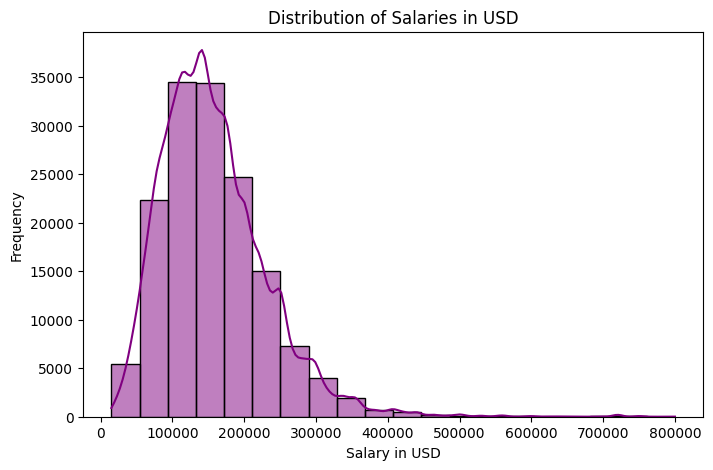

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb as db

# histogram of salaries in USD since 2020
plt.figure(figsize=(8, 5))
sns.histplot(df["salary_in_usd"], bins=20, kde=True, color="purple")
plt.title("Distribution of Salaries in USD")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show() 

###  c) How many job postings are there for each job title? Take the tenth most common job title and plot a bar chart of the number of job postings for that title.

In [6]:
df_job_per_title = db.query("""
    SELECT job_title, COUNT(*) as job_postings
    FROM df
    GROUP BY job_title
    ORDER BY job_postings DESC
    LIMIT 10
""").df()

df_job_per_title

,job_title,job_postings
0,Data Scientist,18751
1,Software Engineer,16948
2,Data Engineer,16352
3,Data Analyst,13779
4,Engineer,11004
5,Machine Learning Engineer,8887
6,Manager,7811
7,Analyst,5396
8,Research Scientist,3460
9,Product Manager,2576


C:\Users\metal\AppData\Local\Temp\ipykernel_17760\102863134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_job_per_title,


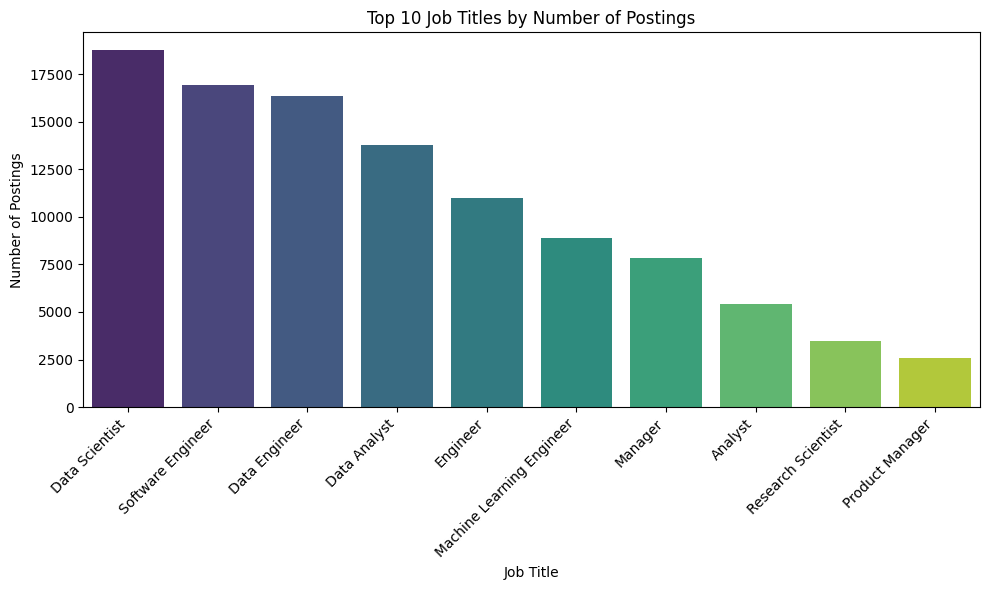

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_job_per_title, 
            x="job_title", y="job_postings",
            palette="viridis", hue=None, ax=ax
)
ax.set_title("Top 10 Job Titles by Number of Postings")
ax.set_xlabel("Job Title")
ax.set_ylabel("Number of Postings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### d) Create a dataframe that contains the following columns: job_title, experience_level, median_salary_usd, mean_salary_usd, mean_salary_sek. Sort the dataframe by mean_salary_sek.

In [22]:
df_salary_sek = db.query("""
    SELECT 
        job_title, 
        experience_level,
        MEDIAN(salary_in_usd) AS median_salary_usd,
        AVG(salary_in_usd) AS mean_salary_usd,
        AVG(salary_in_usd/9.5) AS mean_salary_sek -- Approx conversion rate usd to sek
    FROM df
    GROUP BY job_title, experience_level
    ORDER BY mean_salary_sek DESC
""").df()   

df_salary_sek.head()

,job_title,experience_level,median_salary_usd,mean_salary_usd,mean_salary_sek
0,AI Architect,MI,800000.0,800000.0,84210.526316
1,Research Team Lead,SE,450000.0,450000.0,47368.421053
2,Principal Data Scientist,EX,416000.0,416000.0,43789.473684
3,Analytics Engineering Manager,SE,399880.0,399880.0,42092.631579
4,Data Science Tech Lead,SE,375000.0,375000.0,39473.684211
